# Build a machine learning pipeline

## Learning objectives

* Build a machine learning pipeline in Python, stage by stage
* This example was adapted from a physical copy of the book "Hands-On Machine Learning with Scikit-Learn, Keras and TensforFlow, by Aurélien Géron", published by O'Reilly.
* The book can be found [here](https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/).

## Task

* You are provided with a dataset (from the Statlib repository) hosted by the author above.
* This dataset contains information on California house prices, aggregated from 1990 California census data.
* Your task is to build a model to predict house prices in various Californian "districts", based on the census data collected for them.
* Features in the dataset include population, median income, median house price, and more.

## Planning

Before jumping into code, lets review our machine learning pipeline stages. Have a think about what kind of tasks we will perform in each stage. Dont worry if you feel you dont have enough information at this stage: you can always add some more detail later on.

1. Define problem
2. Collect data
3. Preprocess data for exploration (if required)
4. Explore and visualise data
5. Select model
6. Define performance metrics
7. Perform feature engineering
8. Train model
9. Evaluate model

## Step 1: define problem

* What kind of machine learning problem/task is this?
* What are our goals? What are we predicting?
* If this was a research task, does what we're doing make sense?
* How would a human answer the question?
* What performance would we be happy with?
* Do we have any assumptions yet? Can we verify these?
* At this stage, do we have any idea about solutions? What might work here based on the task classification?

## Step 2: collect data

* In this case, we can download the dataset directly.

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
def load_housing_data():
    """
    Function to download the housing dataset from the URL specified.
    """

    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)

    with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
            
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

/tmp/ipykernel_38983/1661308266.py:13: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tarball.extractall(path="datasets")


In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step 3: pre-process data for exploration

and 

## Step 4: explore and visualise data

* Depending on your data source, steps 3 and 4 might require a bit of back and forth.
* Remember that you are only processing the data enough to explore/visualise it here: processing to allow model training (or feature engineering), will be performed later.

### Exploration

Lets start with the standard exploration techniques in Pandas:

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Note that the `total_bedrooms` column has some null values.

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

It is common to plot histograms of attributes:

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

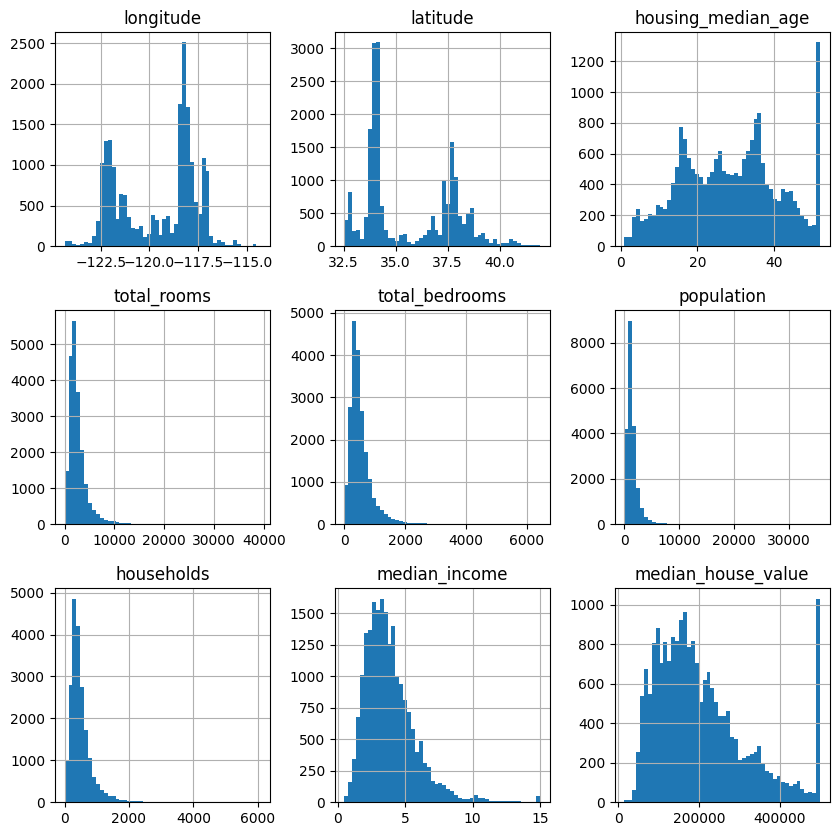

In [7]:
housing.hist(bins=50, figsize=(10, 10))

What does this tell us?

1. Median income: This does not look like it is expressed in USD. The team that created this data let you know that the data has been scaled, and capped at ~15, and at ~0.5 for upper and lower median incomes. The numbers represent roughly k * 10,000 USD.
2. Median house value: Note the value counts of the 500k USD bin: this data has also been capped. This could lead to our model learning that house prices can never exceed this value. If we want our model to perform well, we either need to collect accurate labels (house prices) for these districts, or remove these districts (from the train and test sets) altogether. This means that the model will not be evaluated poorly on these districts, but would not be able to be used to provide predictions. What are the business requirements here? One solution might be preferable.
3. Note the differing scales of the features. We might need to re-scale these.
4. Note that many distributions are quite tail-heavy. We might need to transform these later on.

### Create a test set

* Now is about the right time to create a test set, and to put it aside until you have trained a model.
* We want to avoid "data-snooping" bias.
* Lets create an 80%: 20% split.

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

We have achieved this using random sampling. Remember that using the same random seed each time gives the same results.

However, is random sampling appropriate? What if the distribution of features in the test set is different to that of the training set?

For example, lets say we are surveying 1000 people in the UK. How many women and men should we pick for our survey for it to be representative of the population as a whole? 500 of each gender would imply a gender distribution of 50%: 50%. If this is actually 51%: 49%, we should really select 510 and 490 (male and female) individuals.

Our data scientists have informed us that median income is an important attribute for predicting median house prices. Lets see if we can ensure that our test set is representative of these income categories.

First, lets create income categories, as median income is continuous.

In [9]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)

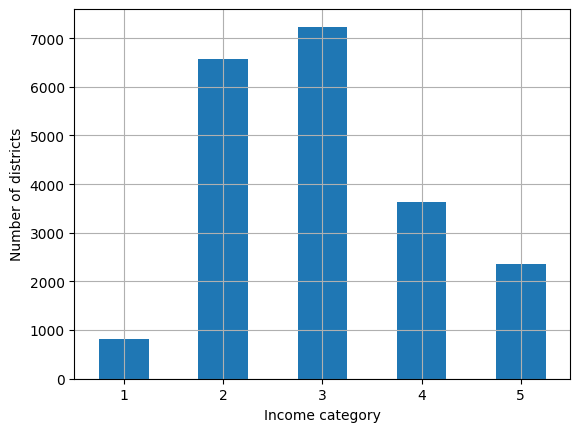

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show;

We can use `scikit-learn` to create a stratified sample based on the income category:

In [11]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42
)

We can check the proportions of each category in the test set:

In [12]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

We can then compare this to the proportions in the original dataset:

In [13]:
def income_cat_proportions(df):
    return df["income_cat"].value_counts() / len(df)

In [14]:
# Create random sample test set
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
# Create table and calculate percentage errors:
compare_props = pd.DataFrame({
    "Overall %": income_cat_proportions(housing),
    "Stratified %": income_cat_proportions(strat_test_set),
    "Random %": income_cat_proportions(test_set),
}).sort_index()

compare_props.index.name = "Income Category"

compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)

compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
                                  
(compare_props * 100).round(2)

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Income Category,,,,,
1,3.98,4.00,4.24,0.36,6.45
2,31.88,31.88,30.74,-0.02,-3.59
3,35.06,35.05,34.52,-0.01,-1.53
4,17.63,17.64,18.41,0.03,4.42
5,11.44,11.43,12.09,-0.08,5.63


The test set created with stratified sampling has proportions of each income category closer to the initial dataset. The test set created using random sampling is skewed slightly.

Now that we have created our test set, we should also only operate (including visualisation) on our train set.

Final note: You need to be careful selecting strata, and ensure that there are enough samples in each stratum.

### Visualising geographical data

* Any data with latitude and longitude columns should be plotted immediately!
* However, as we are just exploring at the moment, lets create a copy of our training set for safety.
* If our dataset was very large, we might want to randomly sample a subset (10%, for example) from our training set to make it easier to work with in local memory.

In [16]:
housing = strat_train_set.copy()

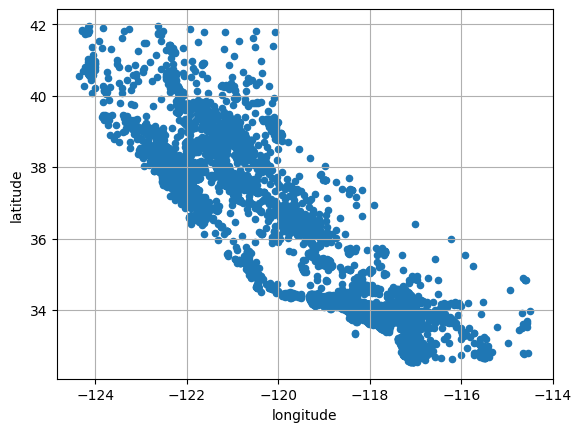

In [17]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

Lets change the `alpha` so we get a better idea of the housing density:

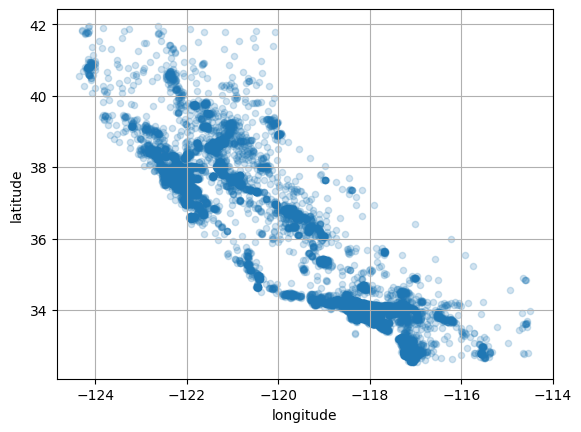

In [18]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

Lets change the radius to represent each district's population, and the colour to represent the house price (using a colourmap).

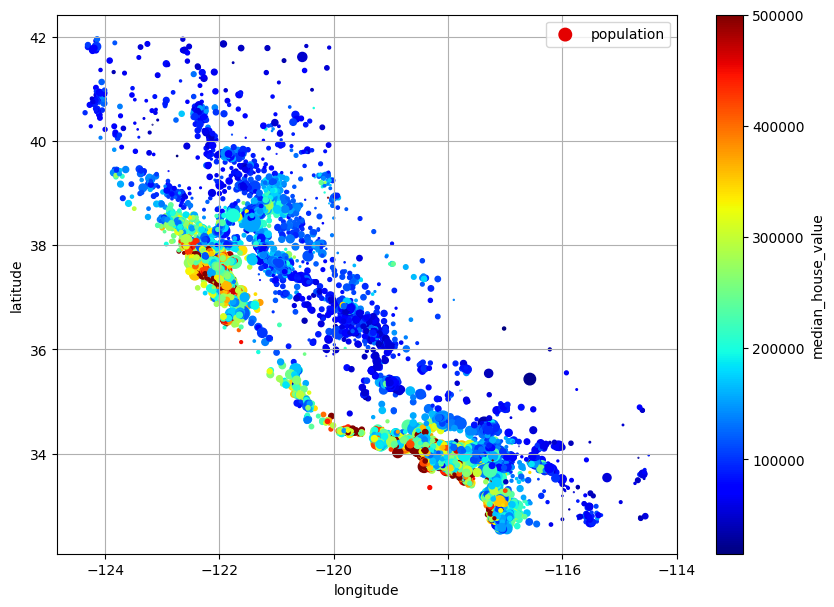

In [19]:
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,
    label="population",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    legend=True,
    sharex=False,
    figsize=(10, 7),
)

plt.show()

### Correlations

* We can also use Pandas to look for correlations between variables:

In [20]:
# This uses Pearson's rank
corr_matrix = housing.corr(numeric_only=True)

In [21]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

We can also use the Pandas scatter matrix:

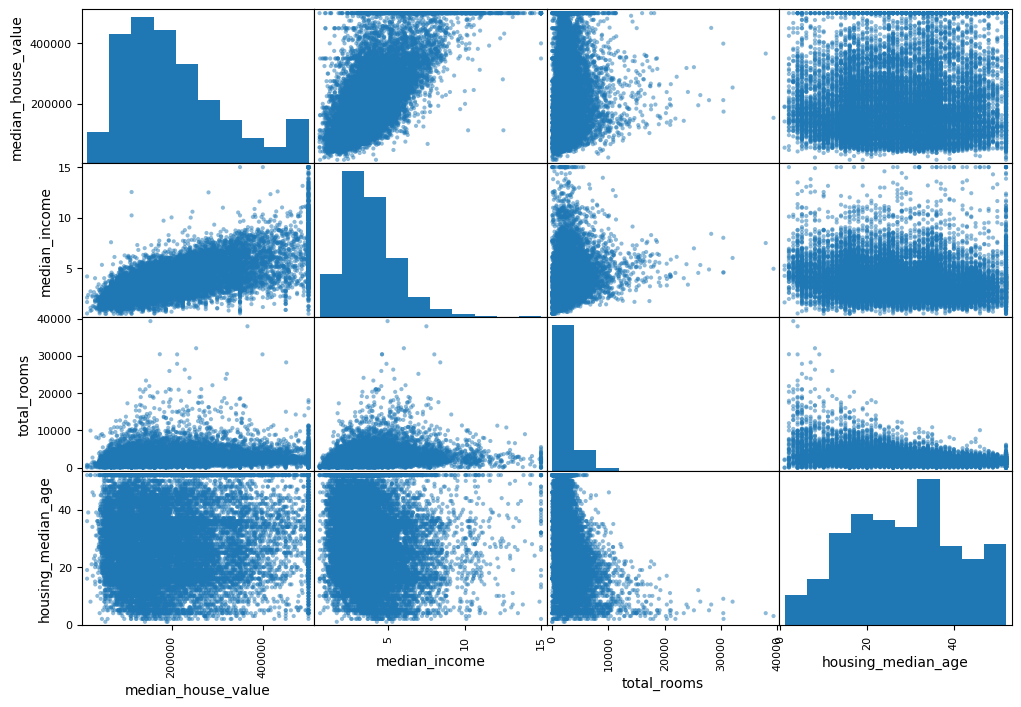

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

That is a lot of data! Note the diagonal, which is instead of a bunch of straight lines (a variable against itself) is the histogram of each variable.

Lets zoom in on median income:

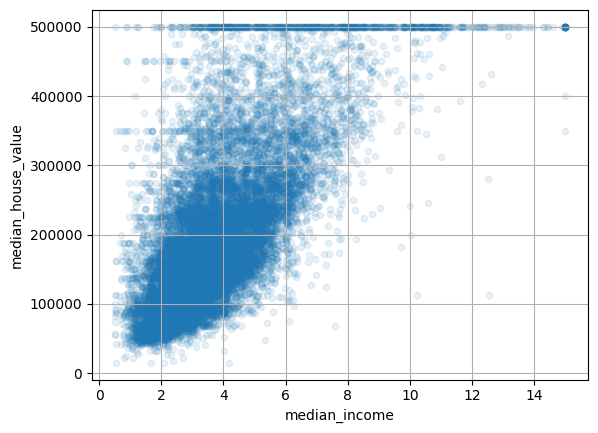

In [23]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

We can see the cap at 500k USD that we mentioned earlier. However, we can also see horizontal lines around ~360k USD and ~460k USD.

These lines are a good example of the kinds of "quirks" in data that could be learned by a machine learning model. How might we address these?

### Feature combinations

* We should also consider whether combinations of features would be helpful during training.
* For example, total number of rooms in a district might be less useful than the rooms per household.
* Similarly, total number of bedrooms might be less useful than total bedrooms per number of rooms.
* Also, population per household seems interesting to look at.

In [24]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [25]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

In this case, the `rooms_per_house` combination is much more correlated than either the total rooms or the number of bedrooms.

## Step 5: select model

At this stage, you should consider what you have learnt about your data, and decide on an initial model to train with. This pipeline stage could be quite short, or quite long. However, you should consider the reasons for selecting particular models (and also transformation techniques).

Note: In general, starting with a linear model is a good idea. It is one of the more simple models, after all!

## Step 6: define performance metrics

Each model and type of problem will have different performance metrics. For a linear model, predicting a continuous variable (i.e. linear regression), root mean squared error might be appropriate. For a classification task, you might be more interested in accuracy, precision, or recall. Pick one (or multiple), and write it down.

You should also consider what the current error is, if performed by a human, or by a random process. This should give you an idea as to whether your model is working correctly, and its potential scope.

For example, if building a machine learning or statistical model to predict tomorrow's weather, can the new model beat "nowcasting", where we assume that tomorrow's weather is the same as today's? Can the new model beat a random model, where we flip a coin to determine the weather? Can it beat an expert, i.e. the current forecasting accuracy data? These are relatively simple checks to make!

## Step 7: perform feature engineering

* Depending on your model and type of task, there might be some preparation of data for your machine learning algorithm.
* Remember that you will need to apply these transformations to the test set as well. Hence, these functions and processes should be as modular as possible.
* There are standard transformations for each model and type of task. Some of these can be applied immediately (with know-how of course). For example, some models require things like one-hot encoding, where categoric columns are split into columns of binary representations.
* However, it is generally not a good idea to throw all of these processes at your data before starting. For example, lets say we want to replicate a research paper to check the performance of a model. If it has a complicated series of transformations before training, it might be worth checking the performance of a simple linear model operating on minimally transformed data. More than a few research papers present highly complex models and pre-processing stages just to perform worse than linear regression!

Note: I am wrapping up data cleaning and feature engineering in the same stage here. The line between these is a bit blurry. I generally consider cleaning with feature engineering as you shouldnt make data cleaning decisions until you know what machine learning you are going to perform. What if you clean something useful?

### Before we start

* First, we need to ensure that the labels from the training set have been removed:

In [26]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

### Types of feature engineering

There are too many to count (as well as being model specific). Each has practically its own field of study. We could look at the following:

* Address null values (drop values, drop whole attribute, impute values to mean/median)
* Handle outliers
* Address scaling issues (min-max scaling/normalisation, standardisation)
* Address categoric variables (ordinal encoding, one-hot encoding)

You might also want to create new features, extract new features, create time series data, identify principle components, and many more.

### Dropping missing values

We have some options to deal with null values. Here are three options:

In [27]:
#### Option 1: drop the values/rows that contain null values
# df.dropna(subset=["total_bedrooms"], inplace=True)

### Option 2: drop whole column/feature that has the null values 
# df.drop("total_bedrooms", axis=1)

### Option 3: impute missing values with median
# median = df["total_bedrooms"].median()
# df["total_bedrooms"].fillna(median, inplace=True)

Lets use option 1, but on a copy of the dataset. First identify the null rows:

In [28]:
null_rows_idx = housing.isnull().any(axis=1)
housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND,3
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN,3
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN,3
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN,4
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN,5


In [29]:
print(len(housing.loc[null_rows_idx]))

168


Copy the housing DataFrame and drop these.

In [30]:
housing_option1 = housing.copy()

housing_option1.dropna(subset=["total_bedrooms"], inplace=True)

housing_option1.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat


In [31]:
# Check we have dropped the correct number
print(len(housing) - len(housing_option1))

168


Alternatively, we can impute the missing values. We could use the same process as option 3 above, but we can also use `scikit-learn`.

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
imputer = SimpleImputer(strategy="median")

# Drop text attributes as we can't impute these
housing_num = housing.select_dtypes(include=[np.number])

In [34]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

The imputer has calculated the median of each attribute. These can be accessed as follows:

In [35]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [36]:
imputer.feature_names_in_

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

We should always check these match with the manual calculation:

In [37]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [38]:
for i, median in enumerate(housing_num.median().values):
    assert median == imputer.statistics_[i]

We can now transform the training set (i.e. replace missing values using the learned medians):

In [39]:
X = imputer.transform(housing_num)

We can wrangle this back to a DataFrame if required.

In [40]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [41]:
housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


### Text and categorical attributes

* Many machine learning models require processing of categorical/text/string attributes. Generally, machine learning algorithms prefer numbers!
* One common processing step is called ordinal encoding, where we replace the categories with a numeric value.
* Another common processing step is *one-hot* encoding, where a categorical attribute with n categories is converted into n binary attributes—one for each category. Each attribute takes a value of 1 for its corresponding category and 0 for all others.
* Lets try ordinal encoding of the ocean proximity attribute.

In [42]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [43]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [44]:
housing_cat_encoded[:8]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One problem with ordinal encoding is that some algorithms will infer that two attribute values are similar based on their proximity in the new numerical space, i.e. categories 0 and 1 and more alike, compared to 0 and 4. Thats where one-hot encoding comes in.

In [46]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

In [47]:
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

This is a SciPy sparse matrix, where we only store the location of the hot cells. We can create a dense numpy array as follows:

In [48]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

Or alternatively:

In [49]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

As before, you can access categories through the encoder object:

In [50]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If you have many possible values in your categorical attributes (for example, words in a tweet), you will create huge matrices. In this case, you might want to look at alternative strategies, such as vector embeddings. 

Another approach is trying to replace categoric attributes with a continuous numeric attribute. For example, ocean proximity could be calculated as a continuous distance to the ocean.

### Feature scaling

* Some of our features have very different scales. For example:

In [51]:
housing["total_rooms"].min(), housing["total_rooms"].max()

(np.float64(2.0), np.float64(39320.0))

In [52]:
housing["median_income"].min(), housing["median_income"].max()

(np.float64(0.4999), np.float64(15.0001))

We can scale our attributes using min-max scaling (between 0 and 1) or standardisation. Min max scaling is useful if there are few outliers, but can crush values into a small range if there is a major outlier. Standardisation subtracts the mean value, and divides by the standard deviation so the resulting distribution has unit variance. Standardisation struggles in datasets that are not normally distributed (for example, significantly skewed data), it can however cope with lots of outliers (unlike min max scaling) provided they are equally distributed around the mean.

In both cases, we can use `scikit-learn`. For min-max scaling, we can specify a `feature_range` parameter.

In [53]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [54]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
housing_num_std_scaled = std_scaler.fit_transform(housing_num)

### Transformation pipelines

To make our processing reproducible, we can use a `scikit-learn` pipeline. The ensures that we execute all of our pipeline stages in the correct order. We should create separate pipeline sub-processes for numerical and categorical attributes.

First create a pipeline to process the numerical attributes. We will perform the following steps:

1. Impute missing values as medians
2. Perform standardisation

Then create a pipeline to process the categoric variables:

1. Impute missing categoric variables as most frequent
2. Perform one-hot encoding

Note: you can create pipelines using the `Pipeline` class or the `make_pipeline` function.

First create the numerical attribute pipeline:

In [55]:
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [56]:
num_pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [57]:
num_pipeline.steps

[('simpleimputer', SimpleImputer(strategy='median')),
 ('standardscaler', StandardScaler())]

Then create the categorical attribute pipeline:

In [58]:
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")
)

We now need to create a final pipeline, and define which columns should be processed by which:

In [59]:
from sklearn.compose import ColumnTransformer

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]

cat_attribs = ["ocean_proximity"]

preprocessing = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])

In [60]:
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['longitude', 'latitude', 'housing_median_age',
                                  'total_rooms', 'total_bedrooms', 'population',
                                  'households', 'median_income']),
                                ('cat',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['ocean_proximity'])])

Finally, we can create our prepared dataset to be used for training:

In [61]:
housing_prepared = preprocessing.fit_transform(housing)

We can get a DataFrame out:

In [62]:
housing_prepared_fr = pd.DataFrame(
    housing_prepared, columns=preprocessing.get_feature_names_out(), index=housing.index
)

housing_prepared_fr.head()

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0
14689,1.231216,-0.884924,-0.919891,0.702262,0.742306,0.383175,0.731375,-0.850281,0.0,1.0,0.0,0.0,0.0
20507,0.711362,-0.875549,0.589800,0.790125,1.595753,0.444376,1.755263,-0.180365,0.0,0.0,0.0,0.0,1.0


### Summary

With that, lets wrap up our cleaning, feature engineering and preprocessing. As you can see, machine learning isnt just about the training: in real world scenarios, most of your time will be spent here.

Please note that this was not an exhaustive list, and you should not blindly apply these stages to other problems!

## Step 8: train model

Finally! This is actually relatively straightforward now that we have spent lots of time preparing our data.

Lets use our linear regression model initially.

In [63]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

## Step 9: evaluate model

* First lets compare the first 5 predictions with the actual values (i.e. the first 5 labels):

In [64]:
housing_predictions = lin_reg.predict(housing)
housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([270900., 334800., 119900., 109200., 305600.])

In [65]:
housing_labels.iloc[:5].values

array([458300., 483800., 101700.,  96100., 361800.])

We can calculate the root mean squared error as before:

In [66]:
from sklearn.metrics import root_mean_squared_error

lin_rmse = root_mean_squared_error(housing_labels, housing_predictions)
lin_rmse

np.float64(68232.83515124217)

Our model error is off (on average) by 68,000 USD. Thats not so good! What is going on here?

This is an example of underfitting: the model does not have the capacity to learn from the features, or the features do not provide enough information to make good predictions.

Lets try a different model, a decision tree:

In [67]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(housing, housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [68]:
housing_predictions = tree_reg.predict(housing)
tree_rmse = root_mean_squared_error(housing_labels, housing_predictions)
tree_rmse

np.float64(0.0)

An error of 0.0? Have we really created a model with zero prediction error?

Probably not. This could be an example of extreme overfitting.

## Step 10: what next?

We have a few options here:

1. We can evaluate our model in more depth, using techniques such as (k-fold) cross validation.
2. We can trial new model types, aiming to shortlist a few candidates to fine tune.
3. We can fine tune our shortlisted models, using techniques such as hyperparameter tuning, grid search, and randomised search. This will maximise model performance, and help us select a final model.

When we think that we have an idea of a "final trained model" we should only then evaluate our model on the test set. For now, I will treat our linear model as our final model.

### Step 11: evaluate on the test set

* When you have a trained, fine tuned model that you cannot improve on, it is time to evaluate it on the test set.


In [69]:
final_model = lin_reg

In [70]:
lin_reg

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [71]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = root_mean_squared_error(y_test, final_predictions)
print(final_rmse)

71002.8377692045


As you can see, our error is slightly worse than on the training set. We probably want to trial different models, or go and collect some more/better data.

#### Exercise
In step 9 we claimed that the decision tree could be an example of extreme overfitting. Try evaluating this model on the test set to prove/disprove this hypothesis.
(hint: on the training set, the RMSE was 0.0 implying it was the "perfect" model)

## Extra: saving models

We can save our trained models using `joblib`. This is commented out so it does not run.

In [72]:
import joblib

# joblib.dump(lin_reg, "housing_model.pkl")

And we can reload them as follows:

In [73]:
# lin_reg_reloaded = joblib.load("housing_model.pkl")
# lin_reg_reloaded